In [1]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from scipy.interpolate import interp1d
from scipy.stats import binned_statistic_2d
from numba import njit
import importlib
import galaxy

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [3]:
def get_stellar_mass(sn):
    if sn.NumPart_Total[4] == 0:
        return 0.0

    return np.sum(sn.part4.mass.value[sn.part4.GFM_StellarFormationTime > 0])

def weighted_median(values, weights):
    i = np.argsort(values)
    c = np.cumsum(weights[i])
    return values[i[np.searchsorted(c, 0.5 * c[-1])]]

def get_halfmass_radius(sn):
    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    
    if sn.NumPart_Total[4] == 0:
        return np.nan
    
    pos = sn.part4.pos.value - center
    mass = sn.part4.mass.value
    r = np.linalg.norm(pos, axis=1)
    
    is_star = sn.part4.GFM_StellarFormationTime > 0
    if np.sum(is_star) <= 1:
        return np.nan
    
    rhalf = weighted_median(r[is_star], mass[is_star])
    
    return rhalf

# merger

In [18]:
sfr['MW9_GSE5_lvl5'] = np.genfromtxt(basepath + 'runs/MW9_GSE5/lvl5/output/sfr.txt')
sfr['MW9_GSE5_lvl4'] = np.genfromtxt(basepath + 'runs/MW9_GSE5/lvl4/output/sfr.txt')

In [19]:
sub_l5 = {}
sub_l4 = {}
for idx in tqdm(np.arange(400+1)):
    try:
        sub_l5[idx] = arepo.Subfind(basepath + 'runs/MW9_GSE5/lvl5/output/', idx)
    except:
        continue
    
    try:
        sub_l4[idx] = arepo.Subfind(basepath + 'runs/MW9_GSE5/lvl4/output/', idx)
    except:
        continue

100%|██████████| 401/401 [00:24<00:00, 16.33it/s] 


In [20]:
def get_orbit(sub):
    Time = []
    Orbit = []
    for idx in sub.keys():
        if len(sub[idx].SubhaloPos) > 1:
            rdiff = sub[idx].SubhaloPos[1] - sub[idx].SubhaloPos[0]
        else:
            rdiff = np.array([0., 0., 0.])
    
        Orbit.append(rdiff)
        Time.append(sub[idx].Time)

    Orbit = np.array(Orbit)
    Time = np.array(Time)
    
    return Time, Orbit

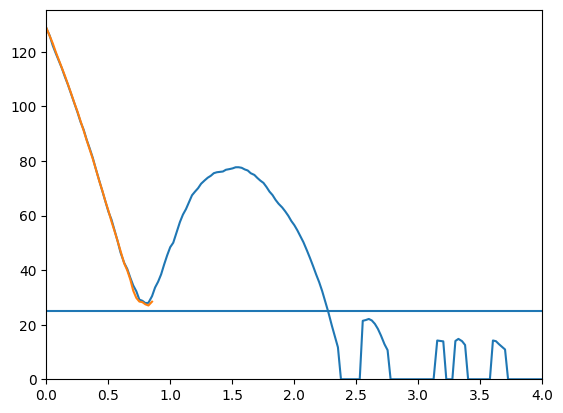

In [21]:
Time_l5, Orbit_l5 = get_orbit(sub_l5)
Time_l4, Orbit_l4 = get_orbit(sub_l4)

rorb_l5 = np.linalg.norm(Orbit_l5, axis=1)
rorb_l4 = np.linalg.norm(Orbit_l4, axis=1)

plt.plot(Time_l5, rorb_l5)
plt.plot(Time_l4, rorb_l4)
plt.ylim(0, None)
plt.xlim(0, 4)
plt.axhline(25)

(0.0, 7.2991485)

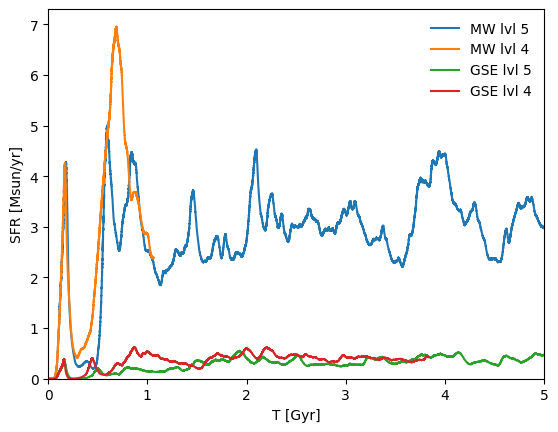

In [7]:
plt.plot(sfr['MW9iso_lvl5'][:,0], sfr['MW9iso_lvl5'][:,2], label='MW lvl 5')
plt.plot(sfr['MW9iso_lvl4'][:,0], sfr['MW9iso_lvl4'][:,2], label='MW lvl 4')
plt.plot(sfr['GSE5iso_lvl5'][:,0], sfr['GSE5iso_lvl5'][:,2], label='GSE lvl 5')
plt.plot(sfr['GSE5iso_lvl4'][:,0], sfr['GSE5iso_lvl4'][:,2], label='GSE lvl 4')
plt.legend(frameon=False)

plt.xlim(0, 5)
plt.xlabel('T [Gyr]')
plt.ylabel('SFR [Msun/yr]')

plt.ylim(0, None)

In [9]:
sn120_MWiso_l5 = arepo.Snapshot(basepath + 'runs/MW9iso/lvl5/output', 120)
sn120_MWiso_l4 = arepo.Snapshot(basepath + 'runs/MW9iso/lvl4/output', 60)
sn120_GSEiso_l5 = arepo.Snapshot(basepath + 'runs/GSE5iso/lvl5/output', 120)
sn120_GSEiso_l4 = arepo.Snapshot(basepath + 'runs/GSE5iso/lvl4/output', 120)

In [10]:
print('stellar mass at 3 Gyr [1E10 Msun]')
print('MWiso l5:', get_stellar_mass(sn120_MWiso_l5))
print('MWiso l4:', get_stellar_mass(sn120_MWiso_l4))
print('GSEiso l5:', get_stellar_mass(sn120_GSEiso_l5))
print('GSEiso l4:', get_stellar_mass(sn120_GSEiso_l4))

stellar mass at 3 Gyr [1E10 Msun]
MWiso l5: 0.518694
MWiso l4: 0.29957637
GSEiso l5: 0.049226616
GSEiso l4: 0.07071982


In [12]:
print('half mass radius at 3 Gyr [kpc]')
print('MWiso l5:', get_halfmass_radius(sn120_MWiso_l5))
print('MWiso l5:', get_halfmass_radius(sn120_MWiso_l4))
print('GSEiso l5:', get_halfmass_radius(sn120_GSEiso_l5))
print('GSEiso l5:', get_halfmass_radius(sn120_GSEiso_l4))

half mass radius at 3 Gyr [kpc]
MWiso l5: 3.558425471514664
MWiso l5: 3.6063451059555254
GSEiso l5: 2.8017603804394704
GSEiso l5: 2.698043719674322


In [ ]:
sub_l5 = {}
sub_l4 = {}
for idx in tqdm(np.arange(400+1)):
    try:
        sub_l5[idx] = arepo.Subfind(basepath + 'runs/MW7_GSE4/lvl5-denscut/output/', idx)
    except:
        continue
    
    try:
        sub_l4[idx] = arepo.Subfind(basepath + 'runs/MW7_GSE4/lvl4-denscut/output/', idx)
    except:
        continue

(0.0, 8.974670249999999)

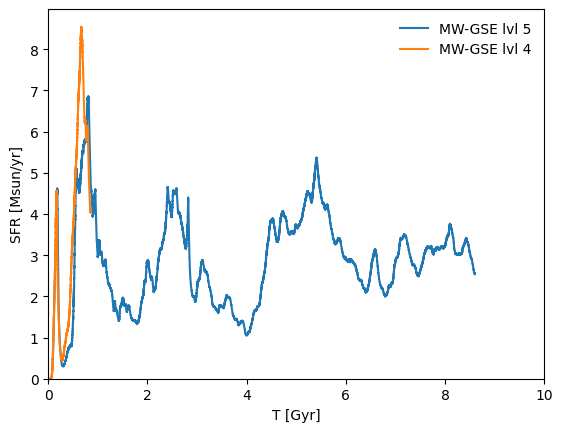

In [16]:
plt.plot(sfr['MW9_GSE5_lvl5'][:,0], sfr['MW9_GSE5_lvl5'][:,2], label='MW-GSE lvl 5')
plt.plot(sfr['MW9_GSE5_lvl4'][:,0], sfr['MW9_GSE5_lvl4'][:,2], label='MW-GSE lvl 4')
plt.legend(frameon=False)

plt.xlim(0, 10)
plt.xlabel('T [Gyr]')
plt.ylabel('SFR [Msun/yr]')

plt.ylim(0, None)

# comparison to previous run which had a starburst

In [73]:
sn0_MW9 = arepo.Snapshot(basepath + 'runs/MW9iso/lvl5/output', 0)
sn0_GSE5 = arepo.Snapshot(basepath + 'runs/GSE5iso/lvl5/output', 0)

sn0_MW7 = arepo.Snapshot(basepath + 'runs/MW7iso/lvl5/output', 0)
sn0_GSE4 = arepo.Snapshot(basepath + 'runs/GSE4iso/lvl5/output', 0)

In [70]:
def get_circular_velocity_curve(sn, Nbins=1000, center=None):
    if center is None:
        center = np.array([sn.BoxSize.value/2.]*3)
    
    G = 43018.7
    
    rmin = 0.1
    rmax = center[0]
    print(rmax)
    
    NTYPES = len(sn.NumPart_Total)
    
    rlist = np.logspace(np.log10(rmin), np.log10(rmax), Nbins)
    Menclist = np.zeros((NTYPES, len(rlist)))
    
    for pt,NumPart in enumerate(sn.NumPart_Total):
        if NumPart == 0:
            continue
        
        part = getattr(sn, 'part'+str(pt))
        r_pt = np.linalg.norm(part.pos.value - center, axis=1)
        
        for i,rcut in enumerate(rlist):
            if sn.MassTable[pt].value > 0:
                Menclist[pt][i] += sn.MassTable[pt].value * np.sum(r_pt <= rcut)
            else:
                Menclist[pt][i] += np.sum(part.mass.value[r_pt <= rcut])
    
    k = np.where(rlist > 97.5)[0][0]
    print(rlist[k], Menclist[:2,k])
    
    vsqlist = G * Menclist / rlist
    
    return rlist, vsqlist
    

In [75]:
rlist_MW9, vsqlist_MW9 = get_circular_velocity_curve(sn0_MW9)
rlist_GSE5, vsqlist_GSE5 = get_circular_velocity_curve(sn0_GSE5, center=np.array([487.5]*3))

rlist_MW7, vsqlist_MW7 = get_circular_velocity_curve(sn0_MW7)
rlist_GSE4, vsqlist_GSE4 = get_circular_velocity_curve(sn0_GSE4)

645.0
97.65275512842022 [ 5.55099297 19.07688   ]
487.5
97.7799232232013 [ 1.15748644 11.6544    ]
645.0
97.65275512842022 [ 1.85667753 23.0904    ]
487.5
97.7799232232013 [ 0.77403784 12.04392   ]


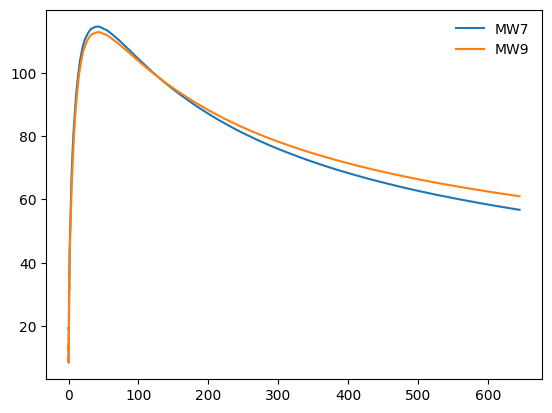

In [76]:
vsq = np.sqrt(np.sum(vsqlist_MW7, axis=0))
plt.plot(rlist_MW7, vsq, label='MW7')

vsq = np.sqrt(np.sum(vsqlist_MW9, axis=0))
plt.plot(rlist_MW9, vsq, label='MW9')

plt.legend(frameon=False)

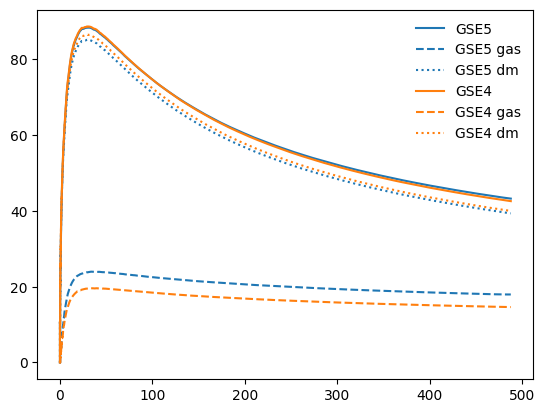

In [77]:
vc = np.sqrt(np.sum(vsqlist_GSE5, axis=0))
l = plt.plot(rlist_GSE5, vc, label='GSE5')
vc0 = np.sqrt(vsqlist_GSE5[0])
vc1 = np.sqrt(vsqlist_GSE5[1])
plt.plot(rlist_GSE5, vc0, c=l[0].get_color(), ls='dashed', label='GSE5 gas')
plt.plot(rlist_GSE5, vc1, c=l[0].get_color(), ls='dotted', label='GSE5 dm')

vc = np.sqrt(np.sum(vsqlist_GSE4, axis=0))
l = plt.plot(rlist_GSE4, vc, label='GSE4')
vc0 = np.sqrt(vsqlist_GSE4[0])
vc1 = np.sqrt(vsqlist_GSE4[1])
plt.plot(rlist_GSE4, vc0, c=l[0].get_color(), ls='dashed', label='GSE4 gas')
plt.plot(rlist_GSE4, vc1, c=l[0].get_color(), ls='dotted', label='GSE4 dm')

plt.legend(frameon=False)

# compare mass < 10 kpc of satellite at 0.5 Gyr

In [80]:
sn20_MW9_GSE5 = arepo.Snapshot(basepath + 'runs/MW9_GSE5/lvl5/output', 20)
sn20_MW7_GSE4 = arepo.Snapshot(basepath + 'runs/MW7_GSE4/lvl5-denscut/output', 20)

sub20_MW9_GSE5 = arepo.Subfind(basepath + 'runs/MW9_GSE5/lvl5/output', 20)
sub20_MW7_GSE4 = arepo.Subfind(basepath + 'runs/MW7_GSE4/lvl5-denscut/output', 20)

In [86]:
def get_Menc_sat(sn, sub):
    center = sub.SubhaloPos[1]
    rcut = 10
    
    r0 = np.linalg.norm(sn.part0.pos.value - center, axis=1)
    r1 = np.linalg.norm(sn.part1.pos.value - center, axis=1)
    r4 = np.linalg.norm(sn.part4.pos.value - center, axis=1)
    
    Menc0 = np.sum(sn.part0.mass.value[r0 < rcut])
    Menc1 = sn.MassTable[1].value * np.sum(r1 < rcut)
    Menc4 = np.sum(sn.part4.mass.value[r4 < rcut])
    
    print('Menc0=', round(Menc0, 3), 'Menc1=', round(Menc1, 3), 'Menc4=', round(Menc4, 3))
    print('total Menc=', round(Menc0+Menc1+Menc4, 3))

In [87]:
print('MW9_GSE5')
get_Menc_sat(sn20_MW9_GSE5, sub20_MW9_GSE5)
print('')
print('MW7_GSE4')
get_Menc_sat(sn20_MW7_GSE4, sub20_MW7_GSE4)

MW9_GSE5
Menc0= 0.135 Menc1= 1.646 Menc4= 0.01
total Menc= 1.791

MW7_GSE4
Menc0= 0.207 Menc1= 1.789 Menc4= 0.011
total Menc= 2.007
